# 1. Import Libraries and Dataset

In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_20newsgroups
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer 
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, make_scorer, precision_score, accuracy_score,f1_score, recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from nltk.tokenize import RegexpTokenizer
from sklearn.pipeline import Pipeline
from nltk.corpus import names
from collections import defaultdict
import os,re
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D,Conv1D, MaxPooling1D,GlobalMaxPooling1D, Input,Dropout, Embedding
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import to_categorical, np_utils
from keras.optimizers import Adadelta,Adam,RMSprop
from keras.initializers import Constant
from keras.utils.vis_utils import plot_model
from sklearn.metrics import accuracy_score,classification_report
from keras import optimizers
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

Using TensorFlow backend.
[nltk_data] Downloading package stopwords to /Users/apple/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/apple/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/apple/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
df_train = pd.read_csv('Data/train.csv')
df_test = pd.read_csv('Data/test.csv')
df_val = pd.read_csv('Data/val.csv')

In [5]:
df_train_pos = pd.read_csv('Data/train_pos.csv')
df_test_pos = pd.read_csv('Data/test_pos.csv')
df_val_pos = pd.read_csv('Data/val_pos.csv')

In [6]:
X_train, y_train = df_train['preprocessed_text'], df_train['target']
X_test, y_test = df_test['preprocessed_text'], df_test['target']
X_val, y_val = df_val['preprocessed_text'], df_val['target']

In [7]:
X_train_pos, y_train_pos = df_train_pos['lemmatized_and_pos'], df_train_pos['target']
X_test_pos, y_test_pos = df_test_pos['lemmatized_and_pos'], df_test_pos['target']
X_val_pos, y_val_pos = df_val_pos['lemmatized_and_pos'], df_val_pos['target']

In [8]:
# Using TFidf Vectorizer 
tfidfV = TfidfVectorizer(min_df = 10) 


# Data  for Neural Networks
X_train_tfidf = tfidfV.fit_transform(df_train.preprocessed_text)
y_train_nn = to_categorical(df_train.target, num_classes=20)
y_val_nn = to_categorical(df_val.target, num_classes=20)
X_val_tfidf = tfidfV.transform(df_val.preprocessed_text)
X_test_tfidf = tfidfV.transform(df_test.preprocessed_text)
y_test_nn = to_categorical(df_test.target, num_classes=20)

In [9]:
# Using TFidf Vectorizer 
tfidf = TfidfVectorizer(min_df = 10) 


# Data  for Neural Networks
X_train_tfidf_pos = tfidf.fit_transform(df_train_pos.lemmatized_and_pos)
y_train_nn_pos = to_categorical(df_train_pos.target, num_classes=20)
y_val_nn_pos = to_categorical(df_val_pos.target, num_classes=20)
X_val_tfidf_pos = tfidf.transform(df_val_pos.lemmatized_and_pos)
X_test_tfidf_pos = tfidf.transform(df_test_pos.lemmatized_and_pos)
y_test_nn_pos = to_categorical(df_test_pos.target, num_classes=20)

In [10]:
X_train_tfidf_pos.shape[1]

20581

# 2. Neural Network Models

## 2.1 First Neural Net

The first neural net I built is a fairly simple one that could take as its input the TF-IDF matrix. As in the machine learning models, I tried this with and without pos_tags to assess the difference

In [11]:
# Defining the model
model1 = Sequential()
model1.add(Dense(1500, input_dim=X_train_tfidf.shape[1], activation='relu'))
model1.add(Dense(20, activation='softmax'))
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Model checkpoints and stoppers. Save the best weights and stops the model when no increase in performance to save time.
esc = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=5, verbose=1, mode='auto')
cp = ModelCheckpoint(filepath="Data/initial_model.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True)

# fitting the model.
m1 = model1.fit(X_train_tfidf, y_train_nn, batch_size=32, epochs=500, callbacks=[esc, cp], validation_data=(X_val_tfidf,y_val_nn))

Train on 10600 samples, validate on 3534 samples
Epoch 1/500
10600/10600 [==============================] - 157s 15ms/step - loss: 1.1629 - accuracy: 0.7385 - val_loss: 0.4998 - val_accuracy: 0.8613

Epoch 00001: val_accuracy improved from -inf to 0.86135, saving model to Data/initial_model.hdf5
Epoch 2/500
10600/10600 [==============================] - 162s 15ms/step - loss: 0.1439 - accuracy: 0.9686 - val_loss: 0.4666 - val_accuracy: 0.8565

Epoch 00002: val_accuracy did not improve from 0.86135
Epoch 3/500
10600/10600 [==============================] - 138s 13ms/step - loss: 0.0331 - accuracy: 0.9958 - val_loss: 0.4628 - val_accuracy: 0.8588

Epoch 00003: val_accuracy did not improve from 0.86135
Epoch 4/500
10600/10600 [==============================] - 137s 13ms/step - loss: 0.0160 - accuracy: 0.9985 - val_loss: 0.4760 - val_accuracy: 0.8602

Epoch 00004: val_accuracy did not improve from 0.86135
Epoch 5/500
10600/10600 [==============================] - 156s 15ms/step - loss: 0.0

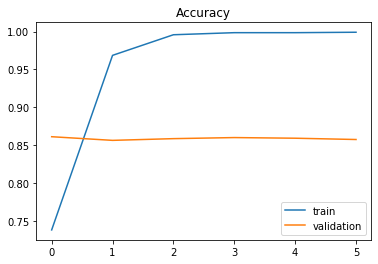

In [12]:
# Training Accuracy History
plt.title('Accuracy')
plt.plot(m1.history['accuracy'], label='train')
plt.plot(m1.history['val_accuracy'], label='validation')
plt.legend()
plt.show();

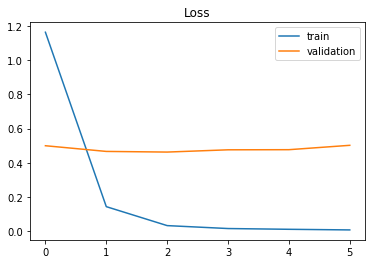

In [13]:
# Training Loss History
plt.title('Loss')
plt.plot(m1.history['loss'], label='train')
plt.plot(m1.history['val_loss'], label='validation')
plt.legend()
plt.show();

In [14]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1500)              13990500  
_________________________________________________________________
dense_2 (Dense)              (None, 20)                30020     
Total params: 14,020,520
Trainable params: 14,020,520
Non-trainable params: 0
_________________________________________________________________


In [21]:
X_train_tfidf_pos.shape

(10600, 20581)

In [22]:
#same model but with pos_tags for comparison

# Defining the model
model2 = Sequential()
model2.add(Dense(2000, input_dim=X_train_tfidf_pos.shape[1], activation='relu'))
model2.add(Dense(20, activation='softmax'))

adam = optimizers.adam(learning_rate = 0.00001)
model2.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])


# Model checkpoints and stoppers. Save the best weights and stops the model when no increase in performance to save time.
esc = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=5, verbose=1, mode='auto')
cp = ModelCheckpoint(filepath="initial_model_pos.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True)

# fitting the model.
m2 = model2.fit(X_train_tfidf_pos, y_train_nn_pos, batch_size=32, epochs=500, callbacks=[esc, cp], validation_data=(X_val_tfidf_pos,y_val_nn_pos))

Train on 10600 samples, validate on 3534 samples
Epoch 1/500
10600/10600 [==============================] - 443s 42ms/step - loss: 2.9805 - accuracy: 0.3561 - val_loss: 2.9630 - val_accuracy: 0.6225

Epoch 00001: val_accuracy improved from -inf to 0.62252, saving model to initial_model_pos.hdf5
Epoch 2/500
10600/10600 [==============================] - 432s 41ms/step - loss: 2.9322 - accuracy: 0.7772 - val_loss: 2.9114 - val_accuracy: 0.7411

Epoch 00002: val_accuracy improved from 0.62252 to 0.74109, saving model to initial_model_pos.hdf5
Epoch 3/500
10600/10600 [==============================] - 427s 40ms/step - loss: 2.8579 - accuracy: 0.8278 - val_loss: 2.8330 - val_accuracy: 0.7668

Epoch 00003: val_accuracy improved from 0.74109 to 0.76684, saving model to initial_model_pos.hdf5
Epoch 4/500
10600/10600 [==============================] - 423s 40ms/step - loss: 2.7573 - accuracy: 0.8439 - val_loss: 2.7346 - val_accuracy: 0.7773

Epoch 00004: val_accuracy improved from 0.76684 to 0.

Epoch 34/500
10600/10600 [==============================] - 411s 39ms/step - loss: 0.3975 - accuracy: 0.9601 - val_loss: 0.7061 - val_accuracy: 0.8599

Epoch 00034: val_accuracy did not improve from 0.86022
Epoch 35/500
10600/10600 [==============================] - 410s 39ms/step - loss: 0.3757 - accuracy: 0.9617 - val_loss: 0.6894 - val_accuracy: 0.8611

Epoch 00035: val_accuracy improved from 0.86022 to 0.86106, saving model to initial_model_pos.hdf5
Epoch 36/500
10600/10600 [==============================] - 411s 39ms/step - loss: 0.3553 - accuracy: 0.9648 - val_loss: 0.6739 - val_accuracy: 0.8625

Epoch 00036: val_accuracy improved from 0.86106 to 0.86248, saving model to initial_model_pos.hdf5
Epoch 37/500
10600/10600 [==============================] - 410s 39ms/step - loss: 0.3360 - accuracy: 0.9678 - val_loss: 0.6593 - val_accuracy: 0.8630

Epoch 00037: val_accuracy improved from 0.86248 to 0.86304, saving model to initial_model_pos.hdf5
Epoch 38/500
10600/10600 [==============

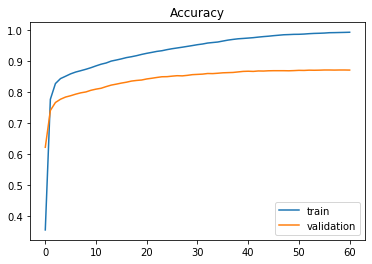

In [23]:
# Training Accuracy History
plt.title('Accuracy')
plt.plot(m2.history['accuracy'], label='train')
plt.plot(m2.history['val_accuracy'], label='validation')
plt.legend()
plt.show();

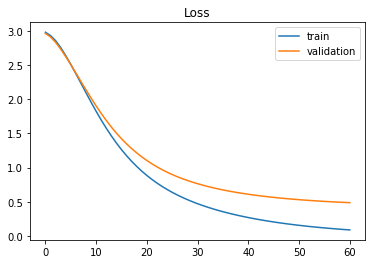

In [24]:
# Training Loss History
plt.title('Loss')
plt.plot(m2.history['loss'], label='train')
plt.plot(m2.history['val_loss'], label='validation')
plt.legend()
plt.show();

In [25]:
pred_test = model2.predict_classes(X_test_tfidf_pos)


In [26]:
pred_test[1]

2

In [27]:
y_test_pos.shape

(4712,)

In [28]:
accuracy = accuracy_score(y_test_pos, pred_test)
accuracy

0.8578098471986417

In [29]:
model2.evaluate(X_test_tfidf_pos,y_test_nn_pos)[1]

4712/4712 [==============================] - 6s 1ms/step


0.857809841632843

In [30]:
%store -r target_name_dict

In [31]:
accuracy = make_scorer(accuracy_score)

precision = make_scorer(precision_score, average='macro')
recall =  make_scorer(recall_score, average='macro')
f1 = make_scorer(f1_score, average='macro')
scoring={'precision':precision,'recall':recall,'f1':f1}

accuracy:  0.8578
f1_score: 0.8578
precision_score: 0.8578
recall_score: 0.8578


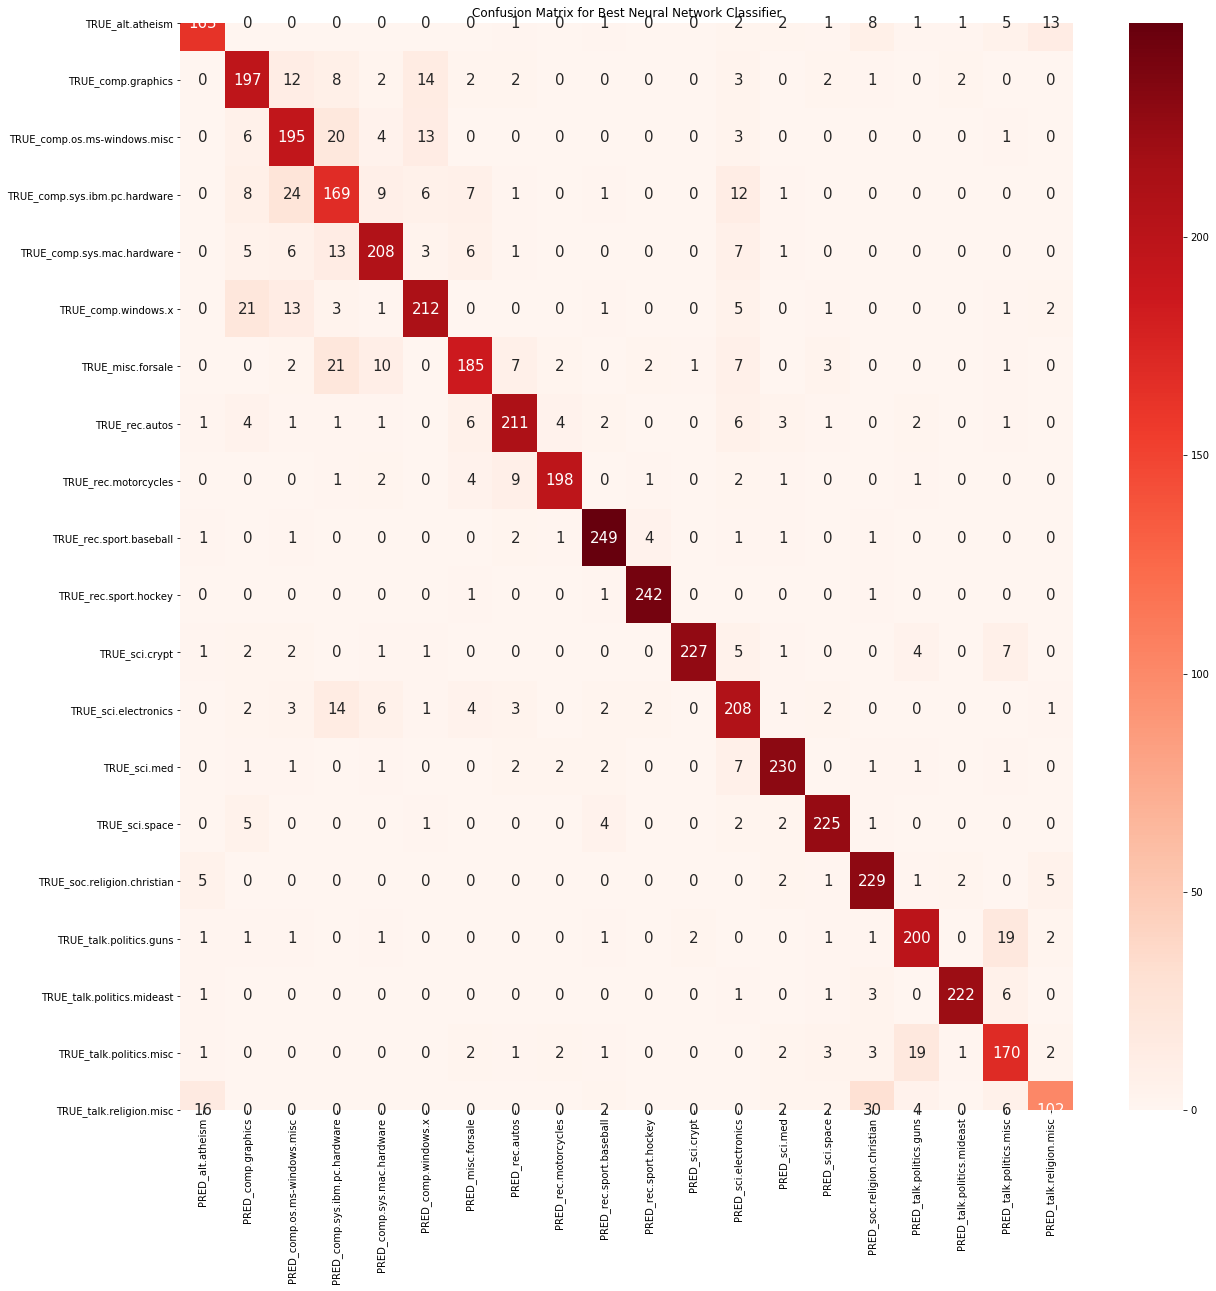

In [32]:
def multi_confusion_matrix(true,pred):
    cm = confusion_matrix(true,pred)
    df_cm = pd.DataFrame(
    cm,
    index = [f'TRUE_{name}' for name in target_name_dict],
    columns = [f'PRED_{name}' for name in target_name_dict])
    sns.heatmap(df_cm, annot=True,annot_kws={'size':15},cmap='Reds',fmt='g')

plt.figure(figsize=(20,20))
plt.title('Confusion Matrix for Best Neural Network Classifier')
multi_confusion_matrix(y_test_pos, pred_test)
print("accuracy: ", round(accuracy_score(y_test_pos, pred_test),4))
for scorer in [f1_score,precision_score,recall_score]:
    name = scorer.__name__
    print(f'{name}: {scorer(y_test_pos, pred_test,average="micro"):.4f}')
plt.savefig('Images/confusion_matrix_nn.png')

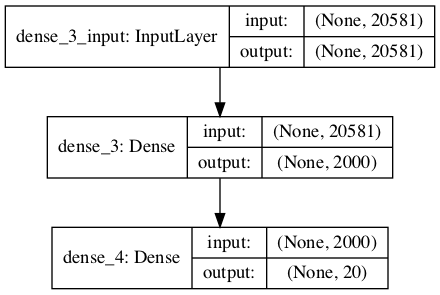

In [33]:

plot_model(model2, to_file='Images/initial_nn.png', show_shapes=True, show_layer_names=True)

## 2.2 Second Neural Net

For the second Neural Net, I built a model that uses precomupted GloVe vectors as an embedding layer

In [113]:
#number of dimensions in precomputed vectors. there are options with higher and lower dimensionality, I have
#chosen middle option

EMBEDDING_DIM = 100 

WORD_VECTOR_FILE = 'Data/glove.twitter.27B.100d.txt' 

In [114]:
#load word vector representations.

%pylab inline --no-import-all
embeddings_index = {}

with open(WORD_VECTOR_FILE) as stream:
    for line in stream:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
        
    stream.close()

print('Found %s word vectors with dim=%s.' % (
    len(embeddings_index),
    next(iter(embeddings_index.values())).shape[0]
))

Populating the interactive namespace from numpy and matplotlib
Found 1193514 word vectors with dim=100.


In [115]:
NUM_UNIQ_WORDS = 15000

tokenizer = Tokenizer(
    num_words=NUM_UNIQ_WORDS,
    lower=False,
    filters='!"\'#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n')

In [116]:
# only fit on training data
# so that texts_to_sequences will only be using the NUM_UNIQ_WORDS most frequent words!
tokenizer.fit_on_texts(X_train_pos)
print('Found %s unique tokens.' % len(tokenizer.word_index))


# generate "word index" vectors from both train and test
# (using only the NUM_UNIQ_WORDS most frequent ones)
seq_train = tokenizer.texts_to_sequences(X_train_pos)
seq_val = tokenizer.texts_to_sequences(X_val_pos)
seq_test = tokenizer.texts_to_sequences(X_test_pos)

Found 178951 unique tokens.


In [117]:
MAX_SEQ_LEN = 1000


data_train = pad_sequences(seq_train, maxlen=MAX_SEQ_LEN, truncating='post')
data_val = pad_sequences(seq_val, maxlen=MAX_SEQ_LEN, truncating='post')
data_test = pad_sequences(seq_test, maxlen=MAX_SEQ_LEN, truncating='post')

labels_train = y_train_nn_pos
labels_val = y_val_nn_pos
labels_test = y_test_nn_pos
print('Size of training set:', len(X_train_pos))
print('Shape of training data tensor:', data_train.shape)
print('Shape of training label tensor:', labels_train.shape)
print('\nSize of val set:', len(X_val_pos))
print('Shape of val data tensor:', data_val.shape)
print('Shape of val label tensor:', labels_val.shape)
print('\nSize of test set:', len(X_test_pos))
print('Shape of test data tensor:', data_test.shape)
print('Shape of test label tensor:', labels_test.shape)

Size of training set: 10600
Shape of training data tensor: (10600, 1000)
Shape of training label tensor: (10600, 20)

Size of val set: 3534
Shape of val data tensor: (3534, 1000)
Shape of val label tensor: (3534, 20)

Size of test set: 4712
Shape of test data tensor: (4712, 1000)
Shape of test label tensor: (4712, 20)


In [118]:
# generate the weight matrix for the connections between the input (the padded "document vector" sequences) and the embedding layer
# these weights will be the GloVe word embedding vectors one for each of the NUM_UNIQ_WORDS possible words we have.

num_uniq_input_words = min(NUM_UNIQ_WORDS, len(tokenizer.word_index))
embedding_matrix = np.zeros((num_uniq_input_words, EMBEDDING_DIM))

for word, i in tokenizer.word_index.items():
    if i == NUM_UNIQ_WORDS:
        break
        
    embedding_vector = embeddings_index.get(word)
    
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
    #else:
    #    # words not found in the index use all-zero vectors
#        print("not in index:", word)

In [119]:
#So this layer will expand the one-dimensional MAX_SEQ_LEN "document word index vectors" into MAX_SEQ_LEN times EMBEDDING_DIM matri

embedding_layer = Embedding(
    num_uniq_input_words,
    EMBEDDING_DIM,
    weights=[embedding_matrix],
    input_length=MAX_SEQ_LEN,
    trainable=True)

In [120]:
# combine input tensor shape ("layer") and embedding layer together

sequence_input = Input(shape=(MAX_SEQ_LEN,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)

In [121]:

x = embedded_sequences

for layer in [
    Conv1D(EMBEDDING_DIM, 5, activation='relu'),
    MaxPooling1D(5),
    Conv1D(EMBEDDING_DIM, 5, activation='relu'),
    MaxPooling1D(5),
    Conv1D(EMBEDDING_DIM, 5, activation='relu'),
    Dropout(0.2), 
    MaxPooling1D(35),
    Flatten(),
]:
    x = layer(x)
    print(layer.name,
          "input:", layer.input_shape,
          "- output:", layer.output_shape)

conv1d_10 input: (None, 1000, 100) - output: (None, 996, 100)
max_pooling1d_10 input: (None, 996, 100) - output: (None, 199, 100)
conv1d_11 input: (None, 199, 100) - output: (None, 195, 100)
max_pooling1d_11 input: (None, 195, 100) - output: (None, 39, 100)
conv1d_12 input: (None, 39, 100) - output: (None, 35, 100)
dropout_4 input: (None, 35, 100) - output: (None, 35, 100)
max_pooling1d_12 input: (None, 35, 100) - output: (None, 1, 100)
flatten_4 input: (None, 1, 100) - output: (None, 100)


In [122]:
n_cats = 20
preds = Dense(n_cats, activation='softmax')(x)

In [135]:
# place the layers into Keras model

model = Model(sequence_input, preds)
from keras import optimizers
adam = optimizers.adam(learning_rate = 0.00001)
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['acc'])
model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 1000)              0         
_________________________________________________________________
embedding_4 (Embedding)      (None, 1000, 100)         1500000   
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 996, 100)          50100     
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 199, 100)          0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 195, 100)          50100     
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 39, 100)           0         
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 35, 100)           5010

In [136]:
%%time

esc = EarlyStopping(monitor='val_acc', min_delta=0, patience=5, verbose=1, mode='auto')
cp = ModelCheckpoint(filepath="Data/embedding_model.hdf5", monitor='val_acc', verbose=1, save_best_only=True)


m3 = model.fit(data_train, labels_train,
          batch_size=24,
          epochs=500,
               callbacks = [esc,cp],
          validation_data=(data_val, labels_val))

Train on 10600 samples, validate on 3534 samples
Epoch 1/500
10600/10600 [==============================] - 256s 24ms/step - loss: 0.6066 - acc: 0.8594 - val_loss: 1.6325 - val_acc: 0.7213

Epoch 00001: val_acc improved from -inf to 0.72128, saving model to Data/embedding_model.hdf5
Epoch 2/500
10600/10600 [==============================] - 258s 24ms/step - loss: 0.5849 - acc: 0.8633 - val_loss: 1.6176 - val_acc: 0.7247

Epoch 00002: val_acc improved from 0.72128 to 0.72467, saving model to Data/embedding_model.hdf5
Epoch 3/500
10600/10600 [==============================] - 256s 24ms/step - loss: 0.5596 - acc: 0.8667 - val_loss: 1.6032 - val_acc: 0.7252

Epoch 00003: val_acc improved from 0.72467 to 0.72524, saving model to Data/embedding_model.hdf5
Epoch 4/500
10600/10600 [==============================] - 249s 24ms/step - loss: 0.5533 - acc: 0.8706 - val_loss: 1.5906 - val_acc: 0.7267

Epoch 00004: val_acc improved from 0.72524 to 0.72666, saving model to Data/embedding_model.hdf5
Ep

10600/10600 [==============================] - 246s 23ms/step - loss: 0.3076 - acc: 0.9158 - val_loss: 1.4411 - val_acc: 0.7589

Epoch 00036: val_acc improved from 0.75806 to 0.75891, saving model to Data/embedding_model.hdf5
Epoch 37/500
10600/10600 [==============================] - 246s 23ms/step - loss: 0.3173 - acc: 0.9125 - val_loss: 1.4401 - val_acc: 0.7600

Epoch 00037: val_acc improved from 0.75891 to 0.76005, saving model to Data/embedding_model.hdf5
Epoch 38/500
10600/10600 [==============================] - 247s 23ms/step - loss: 0.3050 - acc: 0.9143 - val_loss: 1.4393 - val_acc: 0.7603

Epoch 00038: val_acc improved from 0.76005 to 0.76033, saving model to Data/embedding_model.hdf5
Epoch 39/500
10600/10600 [==============================] - 247s 23ms/step - loss: 0.3085 - acc: 0.9161 - val_loss: 1.4387 - val_acc: 0.7603

Epoch 00039: val_acc did not improve from 0.76033
Epoch 40/500
10600/10600 [==============================] - 248s 23ms/step - loss: 0.2977 - acc: 0.9170 

Epoch 110/500
10600/10600 [==============================] - 247s 23ms/step - loss: 0.1610 - acc: 0.9461 - val_loss: 1.5664 - val_acc: 0.7866

Epoch 00110: val_acc did not improve from 0.78664
Epoch 111/500
10600/10600 [==============================] - 246s 23ms/step - loss: 0.1572 - acc: 0.9470 - val_loss: 1.5691 - val_acc: 0.7869

Epoch 00111: val_acc improved from 0.78664 to 0.78693, saving model to Data/embedding_model.hdf5
Epoch 112/500
10600/10600 [==============================] - 247s 23ms/step - loss: 0.1607 - acc: 0.9467 - val_loss: 1.5725 - val_acc: 0.7875

Epoch 00112: val_acc improved from 0.78693 to 0.78749, saving model to Data/embedding_model.hdf5
Epoch 113/500
10600/10600 [==============================] - 246s 23ms/step - loss: 0.1616 - acc: 0.9469 - val_loss: 1.5781 - val_acc: 0.7881

Epoch 00113: val_acc improved from 0.78749 to 0.78806, saving model to Data/embedding_model.hdf5
Epoch 114/500
10600/10600 [==============================] - 247s 23ms/step - loss: 0.1

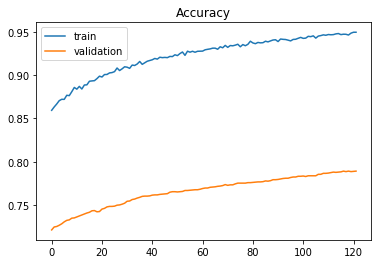

In [137]:
plt.title('Accuracy')
plt.plot(m3.history['acc'], label='train')
plt.plot(m3.history['val_acc'], label='validation')
plt.legend()
plt.show();

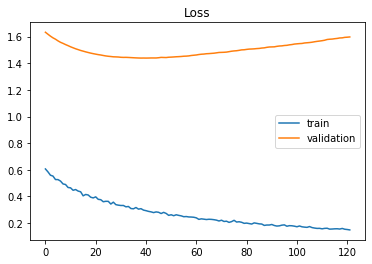

In [138]:
# Training Loss History
plt.title('Loss')
plt.plot(m3.history['loss'], label='train')
plt.plot(m3.history['val_loss'], label='validation')
plt.legend()
plt.show();

In [139]:
model.evaluate(data_test,y_test_nn_pos)[1]

4712/4712 [==============================] - 41s 9ms/step


0.7877758741378784

In [140]:
predictions = model.predict(data_test)

In [141]:
y_pred = (predictions > 0.5)

accuracy:  0.7653
f1_score: 0.7653
precision_score: 0.7653
recall_score: 0.7653


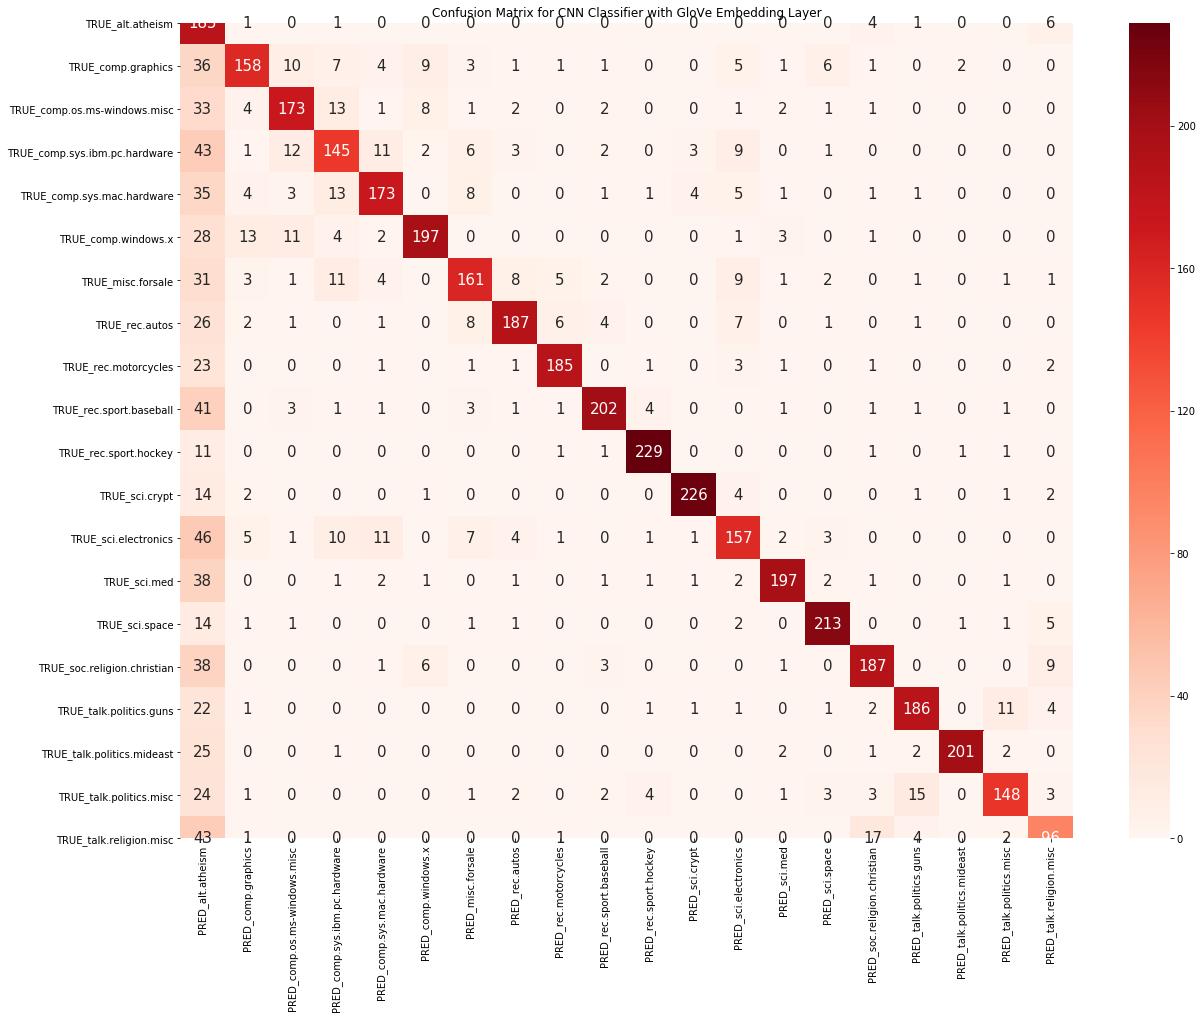

In [142]:
plt.figure(figsize=(20,15))
plt.title('Confusion Matrix for CNN Classifier with GloVe Embedding Layer')
multi_confusion_matrix(y_test_pos, y_pred.argmax(axis=1))
print("accuracy: ", round(accuracy_score(y_test_pos, y_pred.argmax(axis=1)),4))
for scorer in [f1_score,precision_score,recall_score]:
    name = scorer.__name__
    print(f'{name}: {scorer(y_test_pos, y_pred.argmax(axis=1),average="micro"):.4f}')
plt.savefig('Images/cnn_confusion_matrix.png')

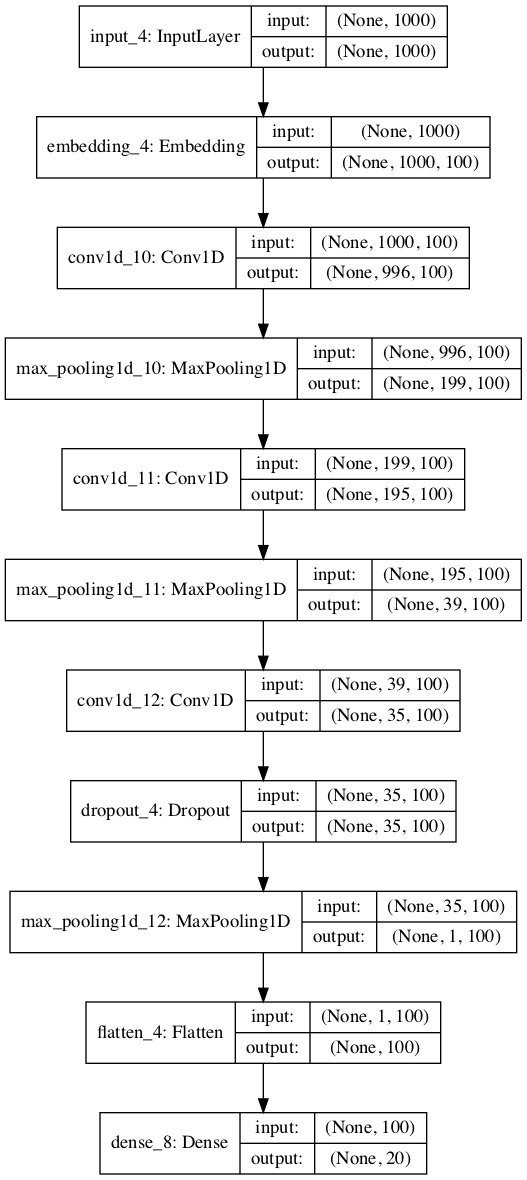

In [134]:

plot_model(model, to_file='Images/cnn_model.png', show_shapes=True, show_layer_names=True)